In [11]:
using JLD2, ProgressBars, Statistics, Plots, DataFrames, StatsPlots

In [12]:
using GLM, StatsBase

In [13]:
D = load_object("simDict.jld2");

In [14]:
N = 15
Dmean = Dict(k => mean(v) for (k,v) in D);
Dmed = Dict(k => median(v) for (k,v) in D);
Dvar = Dict(k => var(v) for (k,v) in D);

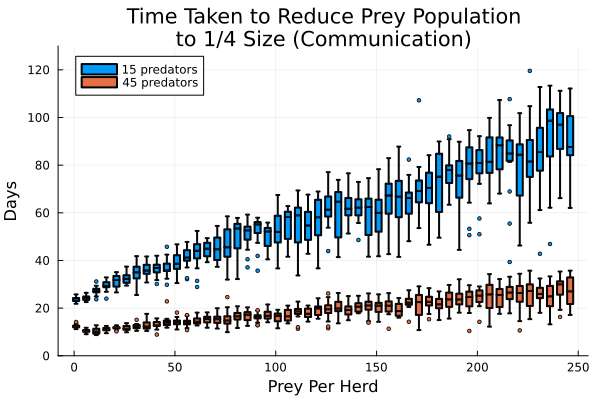

In [15]:
X = 1:250
xvec::Vector{Int} = []
yvec::Vector{Float64} = []
yvec2::Vector{Float64} = []
for x ∈ X
    if !haskey(D,(N, 250, 15, x, false))
        continue
    end
    append!(xvec, repeat([x],N))
    append!(yvec, D[(N, 250, 15, x, true)])
    append!(yvec2, D[(N, 250, 45, x, true)])
end
boxplot(xvec, yvec, linewidth=2, markersize=2, bar_width=3, label="15 predators",
xlab="Prey Per Herd", ylab="Days",
title="Time Taken to Reduce Prey Population\nto 1/4 Size (Communication)",
ylim=(0,130))
boxplot!(xvec, yvec2, linewidth=2, markersize=2, bar_width=3, label="45 predators")

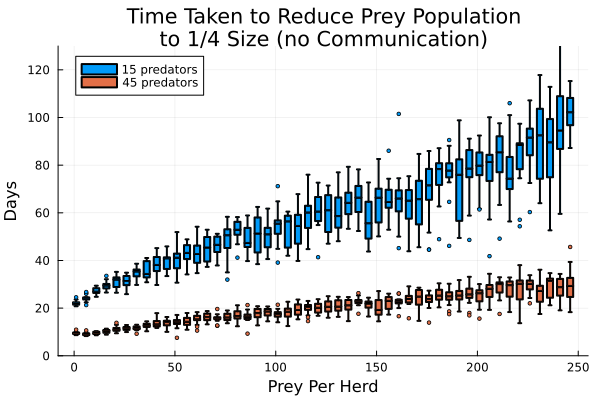

In [16]:
X = 1:250
xvec::Vector{Int} = []
yvec::Vector{Float64} = []
yvec2::Vector{Float64} = []
for x ∈ X
    if !haskey(D,(N, 250, 15, x, false))
        continue
    end
    append!(xvec, repeat([x],N))
    append!(yvec, D[(N, 250, 15, x, false)])
    append!(yvec2, D[(N, 250, 45, x, false)])
end
boxplot(xvec, yvec, linewidth=2, markersize=2, bar_width=3, label="15 predators",
xlab="Prey Per Herd", ylab="Days",
title="Time Taken to Reduce Prey Population\nto 1/4 Size (no Communication)",
ylim=(0,130))
boxplot!(xvec, yvec2, linewidth=2, markersize=2, bar_width=3, label="45 predators")
#savefig("f2.png")

In [17]:
xvec11::Vector{Int} = []
yvec11::Vector{Float64} = []
yvec12::Vector{Float64} = []
yvec13::Vector{Float64} = []
yvec14::Vector{Float64} = []
yvec15::Vector{Float64} = []
yvec16::Vector{Float64} = []
for x ∈ X
    if !haskey(D,(N, 250, 15, x, false))
        continue
    end
    append!(xvec11, x)
    append!(yvec11, Dmed[(N, 250, 15, x, false)])
    append!(yvec12, Dmed[(N, 250, 15, x, true)])
    append!(yvec13, Dmed[(N, 250, 45, x, false)])
    append!(yvec14, Dmed[(N, 250, 45, x, true)])
    append!(yvec15, Dmed[(N, 250, 75, x, false)])
    append!(yvec16, Dmed[(N, 250, 75, x, true)])
end

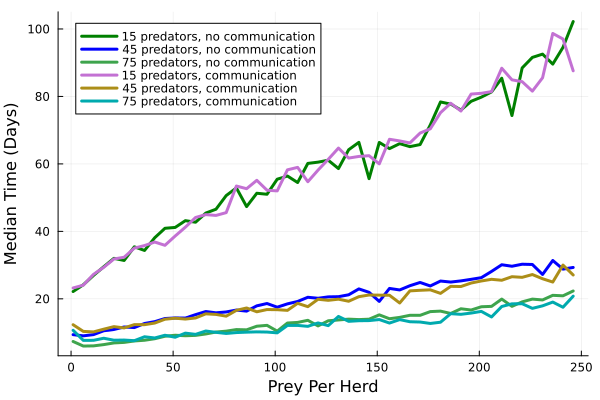

In [18]:
plot(xvec11,yvec11, color=:green, label="15 predators, no communication", linewidth=3,
xlab="Prey Per Herd", ylab="Median Time (Days)")
plot!(xvec11,yvec13, color=:blue, label="45 predators, no communication", linewidth=3)
plot!(xvec11,yvec15, label="75 predators, no communication", linewidth=3)

plot!(xvec11,yvec12, label="15 predators, communication", linewidth=3)
plot!(xvec11,yvec14, label="45 predators, communication", linewidth=3)
plot!(xvec11,yvec16, label="75 predators, communication", linewidth=3)